In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

project_path = '/content/drive/My Drive/Text as Data Project'

os.chdir(project_path)

print("Current working directory:", os.getcwd())

Current working directory: /content/drive/.shortcut-targets-by-id/1N-5CiWkGX3hZkx3aUGblJ3uoxEG7hSDB/Text as Data Project


In [ ]:
import pandas as pd

train_df = pd.read_csv('gp_surgery_reviews_train.csv')
test_df = pd.read_csv('gp_surgery_reviews_test.csv')
val_df = pd.read_csv('gp_surgery_reviews_validation.csv')

# Concatenate them vertically (stacked)
df = pd.concat([train_df, test_df, val_df], axis=0, ignore_index=True)

print(df.shape)
df.head()

(11974, 10)


,free_text,sentiment_free_text,sentiment_score_free_text,free_text_len,rating,feedback_labels,emotion_free_text,label,abs_sentiment,generation_category
0,Very good doctors however some of the receptio...,positive,0.535241,19.0,4.0,Reception Staff Interaction,admiration,0,0.535241,NaN
1,Excellent care from friendly staff always\nThe...,positive,0.953010,243.0,3,Reception Staff Interaction,disappointment,1,0.953010,Reception Staff Interaction
2,Because I have the answer that I needed,positive,0.589906,8.0,5.0,Test Results,approval,0,0.589906,NaN
3,"Reception staff were friendly but slow, making...",negative,0.608614,38.0,2,Reception Staff Interaction,disappointment,1,-0.608614,Accessibility and Convenience
4,The receptionist was friendly but couldn't hel...,negative,0.783410,181.0,3,Reception Staff Interaction,disappointment,1,-0.783410,Staff Empathy and Compassion


In [ ]:
# filtering out AI-generated reviews
df = df[df['label'] == 0]

In [ ]:
# only considering real human generated reviews
df_real = df[df['label'] == 0].copy()
df_real.head()

,free_text,sentiment_free_text,sentiment_score_free_text,free_text_len,rating,feedback_labels,emotion_free_text,label,abs_sentiment,generation_category
0,Very good doctors however some of the receptio...,positive,0.535241,19.0,4.0,Reception Staff Interaction,admiration,0,0.535241,NaN
2,Because I have the answer that I needed,positive,0.589906,8.0,5.0,Test Results,approval,0,0.589906,NaN
5,Telephone appointment was punctual and straigh...,positive,0.824256,9.0,5.0,Appointment Availability,neutral,0,0.824256,NaN
9,An earlier appointment with a Specialist would...,negative,0.595763,18.0,5.0,Appointment Availability,disappointment,0,-0.595763,NaN
11,The lady at reception was really kind and unde...,positive,0.966885,11.0,5.0,Reception Staff Interaction,admiration,0,0.966885,NaN


In [ ]:
len(df_real)

6169

In [ ]:
duplicates_mask = df_real.duplicated(subset='free_text', keep=False)

duplicate_reviews = df_real[duplicates_mask]

duplicate_reviews.sort_values('free_text').head(10)

,free_text,sentiment_free_text,sentiment_score_free_text,free_text_len,rating,feedback_labels,emotion_free_text,label,abs_sentiment,generation_category
7823,A bit more time for consultation,neutral,0.860004,6.0,5.0,Waiting Time,neutral,0,0.860004,NaN
8524,A bit more time for consultation,neutral,0.860004,6.0,5.0,Waiting Time,neutral,0,0.860004,NaN
1740,Absolutely nothing Receptionist doctor were bo...,positive,0.958441,16.0,5.0,Reception Staff Interaction,admiration,0,0.958441,NaN
2235,Absolutely nothing Receptionist doctor were bo...,positive,0.958441,16.0,5.0,Reception Staff Interaction,admiration,0,0.958441,NaN
11168,All good Dr PERSON provides me with Very good ...,positive,0.949945,10.0,4.0,Treatment Quality,admiration,0,0.949945,NaN
9948,All good Dr PERSON provides me with Very good ...,positive,0.949945,10.0,4.0,Treatment Quality,admiration,0,0.949945,NaN
554,All the staff are helpful and friendly,positive,0.963070,7.0,5.0,Staff Professionalism,admiration,0,0.963070,NaN
11215,All the staff are helpful and friendly,positive,0.963070,7.0,5.0,Staff Professionalism,admiration,0,0.963070,NaN
3590,Always has a great manner there is nothing to ...,positive,0.872801,10.0,5.0,Follow-up and Continuity of Care,admiration,0,0.872801,NaN
1325,Always has a great manner there is nothing to ...,positive,0.872801,10.0,5.0,Follow-up and Continuity of Care,admiration,0,0.872801,NaN


In [ ]:
df_real = df_real.drop_duplicates(subset='free_text')

In [ ]:
len(df_real)

6058

In [ ]:
# prompt: please show samples of rows where rating = 4. please use max column width

pd.set_option('display.max_colwidth', None)
df_real[df_real['rating'] == 4].sample(30)


,free_text,sentiment_free_text,sentiment_score_free_text,free_text_len,rating,feedback_labels,emotion_free_text,label,abs_sentiment,generation_category
11167,Had to wait but not for long,neutral,0.591214,7.0,4.0,Waiting Time,neutral,0,0.591214,NaN
10081,Telephones take such a long time to speak to anyone I personally have been in the queue for over 30 minutes I do however understand it s an extremely busy surgery,negative,0.841285,30.0,4.0,Waiting Time,neutral,0,-0.841285,NaN
10615,Good receptionists can speak to a Doctor and see a Doctor face to face,positive,0.578734,15.0,4.0,Reception Staff Interaction,neutral,0,0.578734,NaN
9987,I belong to this surgery for over 30 years and I still feel very confident with the Doctors and all the other staff,positive,0.920471,23.0,4.0,Patient Respect,approval,0,0.920471,NaN
10627,The only criticism is the length of time it takes to get an answer on the phone,negative,0.605905,17.0,4.0,Feedback and Complaints Handling,neutral,0,-0.605905,NaN
11428,More knowledge from the practitioner and more concern to support me,positive,0.870990,11.0,4.0,Follow-up and Continuity of Care,approval,0,0.870990,NaN
10425,I was seen by a totally new Dr I d never seen before Probably because it was shortly arranged The Dr Was very pleasant welcoming The receptionist was very helpful deftly made alterations to fit me in as I had another appointment that morning in another department The new Dr asked many questions made many searches on her computer It was a good useful session,positive,0.951013,67.0,4.0,Reception Staff Interaction,admiration,0,0.951013,NaN
11313,It was a pleasant experience in the newly refurbished Violet Melchett Centre I was called in early which was great the person I saw was very efficient and courteous and answered all my questions clearly and helpfully,positive,0.976986,37.0,4.0,Staff Professionalism,admiration,0,0.976986,NaN
11523,Longer time slot so that there is no delay in starting the appointment,neutral,0.845139,13.0,4.0,Appointment Availability,neutral,0,0.845139,NaN
10262,Hi to be honest the service I use not much but from my experience being there few times I can say that we deserve more help with the amount of experience doctors at GP,neutral,0.434019,36.0,4.0,Patient Respect,approval,0,0.434019,NaN


In [ ]:
## Preprocessing steps


import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download once
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Setup
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Lowercase and remove non-alphabetic characters (preserve words only)
    text = re.sub(r'[^a-zA-Z\s]', ' ', str(text).lower())

    # Tokenize
    tokens = word_tokenize(text)

    # Lemmatize and filter stopwords and short words
    cleaned = [
        lemmatizer.lemmatize(word)
        for word in tokens
        if word not in stop_words and len(word) > 2
    ]

    return ' '.join(cleaned)

# Apply to real reviews
df_real['clean_text'] = df_real['free_text'].apply(clean_text)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# VADER sentiment analysis (less sophisticated than BERT)
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

def classify_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score >= 0.2:
        return 'positive'
    elif score <= -0.2:
        return 'negative'
    else:
        return 'neutral'

# Run it on your clean text
df_real['sentiment_label'] = df_real['clean_text'].apply(classify_sentiment)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df_real['sentiment_score'] = df_real['clean_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [ ]:
df_real['word_count'] = df_real['free_text'].astype(str).apply(lambda x: len(x.split()))


In [ ]:
print(df_real['word_count'].describe())


count    6058.000000
mean       24.376032
std        35.819405
min         1.000000
25%         9.000000
50%        15.000000
75%        26.000000
max       885.000000
Name: word_count, dtype: float64


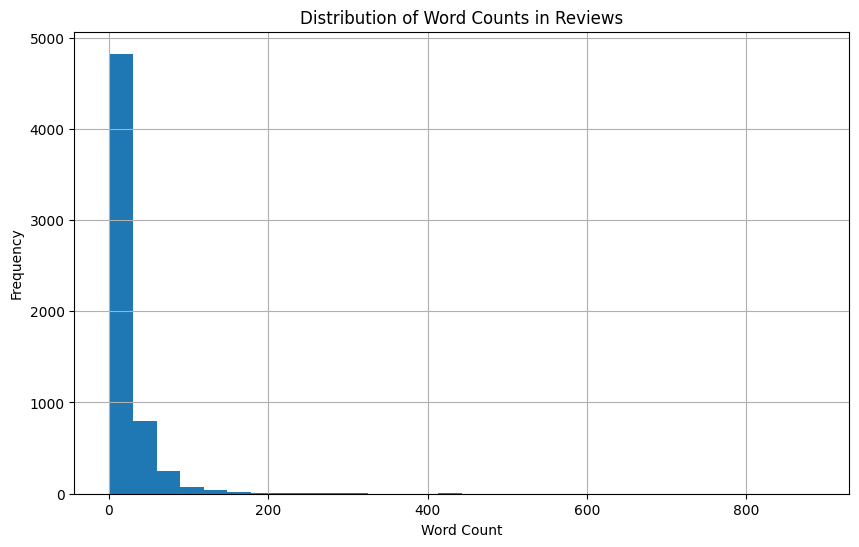

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
df_real['word_count'].hist(bins=30)
plt.title('Distribution of Word Counts in Reviews')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
# !pip install transformers torch

In [ ]:

import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import numpy as np
import pandas as pd
from scipy.special import softmax


In [ ]:
# trying BERT-based sentiment classification
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"

tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


In [ ]:
df_real['token_count'] = df_real['free_text'].astype(str).apply(lambda x: len(tokenizer.tokenize(x)))


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
print(df_real['token_count'].describe())


count    6058.000000
mean       25.643282
std        37.592504
min         1.000000
25%        10.000000
50%        15.000000
75%        28.000000
max       926.000000
Name: token_count, dtype: float64


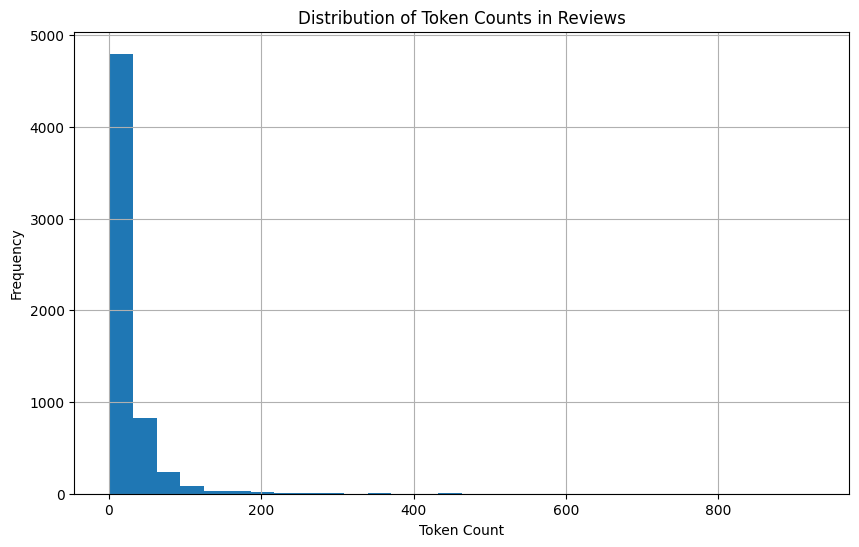

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
df_real['token_count'].hist(bins=30)
plt.title('Distribution of Token Counts in Reviews')
plt.xlabel('Token Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
# only 4 reviews exceed BERT's token limit, which is good. we probably don't need to delete those 4 entries
exceeds_limit = (df_real['token_count'] > 512).sum()
print(f"{exceeds_limit} reviews exceed the 512-token limit ({exceeds_limit / len(df_real):.2%} of the dataset)")


4 reviews exceed the 512-token limit (0.07% of the dataset)


In [ ]:
# BERT sentiment analysis (pos, neg, or neutral)
from scipy.special import softmax
import numpy as np
import torch

def get_bert_sentiment(text):
    # Tokenize input (truncate to 512 tokens)
    encoded_input = tokenizer(text, return_tensors='pt', truncation=True, max_length=512)

    # Get model output
    with torch.no_grad():
        output = model(**encoded_input)

    # Convert logits to probabilities
    scores = softmax(output.logits[0].numpy())

    # Map to labels
    labels = ['negative', 'neutral', 'positive']
    predicted_label = labels[np.argmax(scores)]
    confidence = float(np.max(scores))

    return predicted_label, confidence


In [ ]:
results = df_real['free_text'].astype(str).apply(get_bert_sentiment)
df_real['bert_sentiment_label'] = results.apply(lambda x: x[0])
df_real['bert_sentiment_score'] = results.apply(lambda x: x[1])


In [ ]:
# Ensure rating is numeric
df_real['rating'] = pd.to_numeric(df_real['rating'], errors='coerce')

# Define mapping function
def map_rating_to_sentiment(r):
    if r == 5:
        return 'positive'
    elif r == 4:
        return 'neutral'
    elif r in [1, 2, 3]:
        return 'negative'
    else:
        return None

# Apply function
df_real['rating_based_sentiment'] = df_real['rating'].apply(map_rating_to_sentiment)


In [ ]:
# Drop rows where either label is missing
df_compare = df_real.dropna(subset=['rating_based_sentiment', 'bert_sentiment_label'])

# Calculate agreement rate
agreement_rate = (df_compare['rating_based_sentiment'] == df_compare['bert_sentiment_label']).mean()
print(f"Agreement rate: {agreement_rate:.2%}")


Agreement rate: 73.73%


In [ ]:
pd.crosstab(df_compare['rating_based_sentiment'], df_compare['bert_sentiment_label'], normalize='index')


bert_sentiment_label,negative,neutral,positive
rating_based_sentiment,,,
negative,0.771429,0.168571,0.060000
neutral,0.170108,0.274336,0.555556
positive,0.027118,0.128390,0.844492


In [ ]:
import pandas as pd
import textstat
import matplotlib.pyplot as plt


In [ ]:
def syllables_per_word(text):
    words = textstat.lexicon_count(text, removepunct=True)
    syllables = textstat.syllable_count(text)
    if words == 0:
        return 0
    return syllables / words

df_real['syllables_per_word'] = df_real['free_text'].astype(str).apply(syllables_per_word)


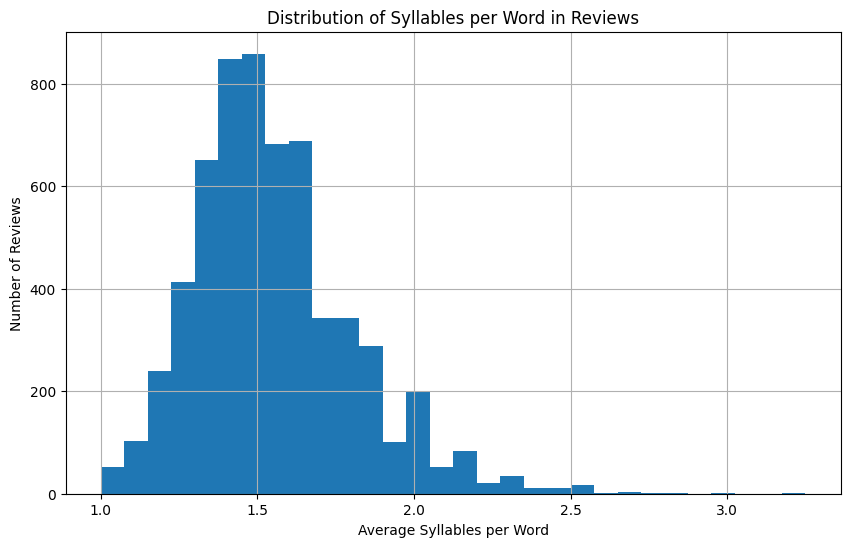

In [ ]:
plt.figure(figsize=(10, 6))
df_real['syllables_per_word'].hist(bins=30)
plt.title("Distribution of Syllables per Word in Reviews")
plt.xlabel("Average Syllables per Word")
plt.ylabel("Number of Reviews")
plt.grid(True)
plt.show()


In [ ]:
# way more positive reviews in the dataset than neg/neutral
sentiment_counts = df_real['bert_sentiment_label'].value_counts()
print(sentiment_counts)


bert_sentiment_label
positive    4237
neutral      954
negative     867
Name: count, dtype: int64


In [ ]:
df_real['rating'] = pd.to_numeric(df_real['rating'], errors='coerce')


In [ ]:
print(df_real['rating'].describe())


count    5884.000000
mean        4.492012
std         0.965724
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64


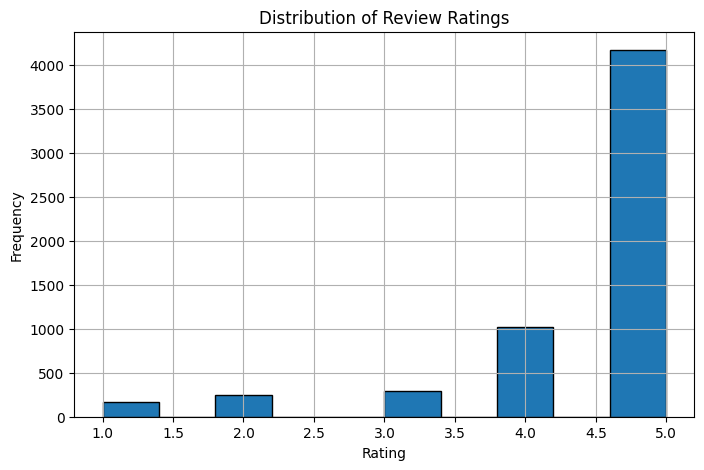

In [ ]:
# high proportion of highly-rated reviews, few lowly-rated reviews
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
df_real['rating'].hist(bins=10, edgecolor='black')
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
sentiment_map = {'negative': -1, 'neutral': 0, 'positive': 1}
df_real['bert_sentiment_score_discrete'] = df_real['bert_sentiment_label'].map(sentiment_map)


In [ ]:
# strong positive correlation which is a good sign
correlation = df_real[['rating', 'bert_sentiment_score_discrete']].corr().iloc[0,1]
print(f"Correlation between rating and BERT sentiment: {correlation:.3f}")


Correlation between rating and BERT sentiment: 0.667


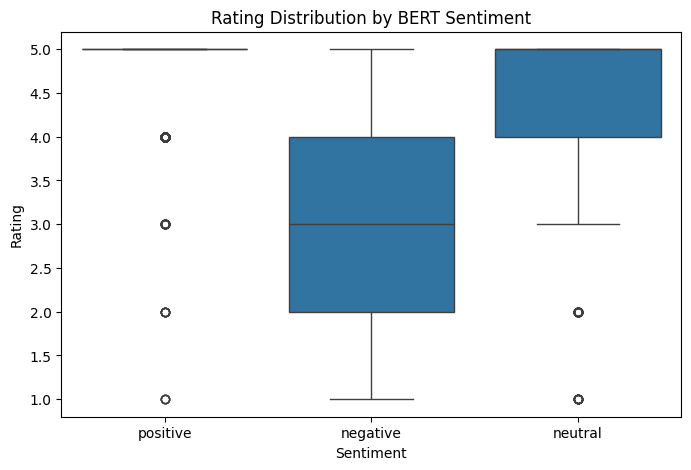

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(data=df_real, x='bert_sentiment_label', y='rating')
plt.title("Rating Distribution by BERT Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Rating")
plt.show()


In [ ]:
# prompt: find how many NAs are in rating column

na_count = df_real['rating'].isna().sum()
print(f"Number of NAs in 'rating' column: {na_count}")


Number of NAs in 'rating' column: 174


In [ ]:
# the means for each category check out
group_stats = df_real.groupby('bert_sentiment_label')['rating'].describe()
print(group_stats)


                       count      mean       std  min  25%  50%  75%  max
bert_sentiment_label                                                     
negative               826.0  2.893462  1.298309  1.0  2.0  3.0  4.0  5.0
neutral                932.0  4.372318  0.906952  1.0  4.0  5.0  5.0  5.0
positive              4126.0  4.839069  0.414624  1.0  5.0  5.0  5.0  5.0


In [ ]:
mismatches = df_real[
    ((df_real['bert_sentiment_label'] == 'positive') & (df_real['rating'] <= 2.0)) |
    ((df_real['bert_sentiment_label'] == 'negative') & (df_real['rating'] >= 4.5))
]


In [ ]:
# looking into mismatches between sentiment and rating
pd.set_option('display.max_colwidth', None)

mismatches[['free_text', 'rating', 'bert_sentiment_label', 'bert_sentiment_score']].sample(20, random_state=42)


,free_text,rating,bert_sentiment_label,bert_sentiment_score
1052,The doctors are mostly amazing and some are spectacular however I have been very unhappy with inability to book face to face appointments and only being able to book telephone appointments both in advance and on the day in emergency clinic I kindly ask to consider the return to pre Covid days when we could pre book face to face appointments and see the doctor on the day,2.0,positive,0.437199
1919,Sometimes Patches is not available until 8am the following day and then it gets booked up very quickly and you have to try again the following day when all you want to is ask an admin question This can be irritating forcing you to phone in but overall it s an excellent surgery,5.0,negative,0.413826
1670,Nothing donâ€™t try to fix it if itâ€™s not broken,5.0,negative,0.499483
3796,There is nothing that would have improved my visit,5.0,negative,0.521812
2589,I cannot think of anyway i could i suggest any improvements,5.0,negative,0.511230
4522,Nothing to be improved very happy with this type of appointment,5.0,negative,0.685171
2665,The toilet wasnâ€™t working and didnâ€™t have any sign to use a different one,5.0,negative,0.897340
6046,Never used website for doctor but no to using a website in answers Too many websites Not everyone has a smartphone or computer Common complaint anong the Senior Citizens I am lucky to have one but get confused,5.0,negative,0.586872
6019,I m not good at internet and prefer to talk to someone,5.0,negative,0.816844
171,Because there were two refferals for stool test They both were positive but there is a chance that not cancer but helicobacter has caused the blood in the stool I would be even more worried without that knowledge,5.0,negative,0.591616


In [ ]:
import textstat

# Apply readability score
df_real['readability'] = df_real['clean_text'].apply(lambda x: textstat.flesch_reading_ease(x) if pd.notnull(x) else None)

# Compare by sentiment
df_real.groupby('bert_sentiment_label')['readability'].mean()


,readability
bert_sentiment_label,
negative,22.658166
neutral,32.580347
positive,27.110583


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

# Count avg sentence length per review
def avg_sentence_length(text):
    if pd.isnull(text): return None
    sentences = sent_tokenize(text)
    words = text.split()
    return len(words) / len(sentences) if len(sentences) > 0 else 0

df_real['avg_sentence_length'] = df_real['free_text'].apply(avg_sentence_length)

# Compare
df_real.groupby('bert_sentiment_label')['avg_sentence_length'].mean()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,avg_sentence_length
bert_sentiment_label,
negative,48.475202
neutral,23.032495
positive,19.747227


In [ ]:
df_real['exclamation_count'] = df_real['free_text'].str.count('!')
df_real.groupby('bert_sentiment_label')['exclamation_count'].mean()


,exclamation_count
bert_sentiment_label,
negative,0.0
neutral,0.0
positive,0.0


In [ ]:
# “Positive reviews contain significantly higher proportions of adjectives and adverbs, highlighting their expressive and emotional tone. In contrast, negative reviews use more verbs, reflecting a focus on actions, issues, and unmet expectations. Neutral reviews sit in between, with simpler, flatter grammatical structure.""

import nltk
nltk.download('punkt')  # for tokenization
nltk.download('averaged_perceptron_tagger_eng')  # for POS tagging

nltk.download('averaged_perceptron_tagger')

# Tag parts of speech
def get_pos_ratios(text):
    if pd.isnull(text): return None
    words = nltk.word_tokenize(text)
    tags = nltk.pos_tag(words)

    total = len(tags)
    if total == 0: return {'JJ': 0, 'RB': 0, 'VB': 0}  # Adjective, Adverb, Verb

    adj = len([t for w, t in tags if t.startswith('JJ')])
    adv = len([t for w, t in tags if t.startswith('RB')])
    verb = len([t for w, t in tags if t.startswith('VB')])

    return {
        'adj_ratio': adj / total,
        'adv_ratio': adv / total,
        'verb_ratio': verb / total
    }

pos_ratios = df_real['free_text'].apply(get_pos_ratios)
df_real['adj_ratio'] = pos_ratios.apply(lambda x: x['adj_ratio'] if x else None)
df_real['adv_ratio'] = pos_ratios.apply(lambda x: x['adv_ratio'] if x else None)
df_real['verb_ratio'] = pos_ratios.apply(lambda x: x['verb_ratio'] if x else None)

# Compare by sentiment
df_real.groupby('bert_sentiment_label')[['adj_ratio', 'adv_ratio', 'verb_ratio']].mean()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,adj_ratio,adv_ratio,verb_ratio
bert_sentiment_label,,,
negative,0.077077,0.077728,0.212734
neutral,0.077889,0.060632,0.189759
positive,0.139734,0.090705,0.167687


In [ ]:
# Count number of words in each review
df_real['review_length_words'] = df_real['free_text'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)

# Group by BERT sentiment label
avg_length_by_sentiment = df_real.groupby('bert_sentiment_label')['review_length_words'].mean()

print(avg_length_by_sentiment)


bert_sentiment_label
negative    48.475202
neutral     23.032495
positive    19.747227
Name: review_length_words, dtype: float64
